<a href="https://colab.research.google.com/github/Liza-Sareen/AMAZON-WEB-CLONE-CSS/blob/main/Research_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [1]:
import os
import keras
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications import VGG16
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
import tensorflow as tf
from keras.optimizers import Adam
from keras.utils import to_categorical
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Mounting Google Drive and managing dataset

In [10]:
img_rows,img_cols=128,128
batch_size=128
epochs=5
x_data=[]
y_data=[]
# Define the root directory
data_dir = '/content/drive/MyDrive/mera_data'
def list_subdirectories(root_dir):
    subdirectories = [os.path.join(root_dir, d) for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    return subdirectories
all_subfolders = list_subdirectories(data_dir)
list_dir=os.listdir(data_dir)
def list_labels(sub_dir):
  label = [os.path.join(sub_dir, d) for d in os.listdir(sub_dir) if os.path.isdir(os.path.join(sub_dir, d))]
  print('label',label)
labels_list = list_labels('/content/drive/MyDrive/mera_data/BEH')
print('labels list',labels_list)
data_dir = '/content/drive/MyDrive/mera_data/BEH'
labels = os.listdir(data_dir)
num_classes = len(labels)
labels
#MY CODE:
labels=[]
for subfolder in all_subfolders:
  data_dir=subfolder
  labels.append(os.listdir(data_dir))
num_classes=len(labels)
data_dir = '/content/drive/MyDrive/mera_data/BEH'
labels = os.listdir(data_dir)
num_classes = len(labels)
labels
dataset_dir='/content/drive/MyDrive/mera_data/BEH'
LIFE_LAB=os.listdir(dataset_dir)
LIFE_LAB#['BEH_GLUCOMA', 'BEH_NORMAL']
num_classes=len(LIFE_LAB)
#print(num_classes)#2
img_rows,img_cols=128,128

label ['/content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA', '/content/drive/MyDrive/mera_data/BEH/BEH_NORMAL']
labels list None


In [13]:
drive='/content/drive/MyDrive/mera_data'
a=os.listdir(drive)
print(a)
s_paths=[]
for subfolder in a:
  x=os.path.join(drive, subfolder)
  s_paths.append(x)


['BEH', 'DRHAGIS', 'LES-AV', 'PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0']


In [4]:
all_subfolder_path=[]
for s in s_paths:
  #print(s)#beh path
  subfolder=os.listdir(s)
  for i in subfolder:
    subfolder_path=os.path.join(s,i)
    all_subfolder_path.append(subfolder_path)
all_subfolder_path

['/content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA',
 '/content/drive/MyDrive/mera_data/BEH/BEH_NORMAL',
 '/content/drive/MyDrive/mera_data/DRHAGIS/Manual_Segmentations',
 '/content/drive/MyDrive/mera_data/DRHAGIS/Mask_images',
 '/content/drive/MyDrive/mera_data/DRHAGIS/Fundus_Images',
 '/content/drive/MyDrive/mera_data/LES-AV/veins',
 '/content/drive/MyDrive/mera_data/LES-AV/arteries',
 '/content/drive/MyDrive/mera_data/LES-AV/images',
 '/content/drive/MyDrive/mera_data/LES-AV/arteries-and-veins',
 '/content/drive/MyDrive/mera_data/LES-AV/vessel-segmentations',
 '/content/drive/MyDrive/mera_data/PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0/FundusImages',
 '/content/drive/MyDrive/mera_data/PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0/ExpertsSegmentations']

In [5]:
num_classes=[]
for s in s_paths:
  subfolder=os.listdir(s)
  print(subfolder)

['BEH_GLUCOMA', 'BEH_NORMAL']
['Manual_Segmentations', 'Mask_images', 'Fundus_Images']
['veins', 'arteries', 'images', 'arteries-and-veins', 'vessel-segmentations']
['FundusImages', 'ExpertsSegmentations']


In [6]:
num_classes=[]
for s in s_paths:
  subfolder=os.listdir(s)
  print(subfolder)
  n=len(subfolder)
  print(n)
  num_classes.append(n)
print(num_classes)

['BEH_GLUCOMA', 'BEH_NORMAL']
2
['Manual_Segmentations', 'Mask_images', 'Fundus_Images']
3
['veins', 'arteries', 'images', 'arteries-and-veins', 'vessel-segmentations']
5
['FundusImages', 'ExpertsSegmentations']
2
[2, 3, 5, 2]


In [7]:
for path in all_subfolder_path:
  #print(path)
  img=os.listdir(path)
  x=[]
  y=[]
  for i in img:
    img_path=os.path.join(path,i)
    #extract x and y
    x.append(img_path)
for s in s_paths:
  subfolder=os.listdir(s)
all_subfolder_path

['/content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA',
 '/content/drive/MyDrive/mera_data/BEH/BEH_NORMAL',
 '/content/drive/MyDrive/mera_data/DRHAGIS/Manual_Segmentations',
 '/content/drive/MyDrive/mera_data/DRHAGIS/Mask_images',
 '/content/drive/MyDrive/mera_data/DRHAGIS/Fundus_Images',
 '/content/drive/MyDrive/mera_data/LES-AV/veins',
 '/content/drive/MyDrive/mera_data/LES-AV/arteries',
 '/content/drive/MyDrive/mera_data/LES-AV/images',
 '/content/drive/MyDrive/mera_data/LES-AV/arteries-and-veins',
 '/content/drive/MyDrive/mera_data/LES-AV/vessel-segmentations',
 '/content/drive/MyDrive/mera_data/PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0/FundusImages',
 '/content/drive/MyDrive/mera_data/PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0/ExpertsSegmentations']

done
9/9 [==============================] - 110s 11s/step - loss: 0.0832 - accuracy: 0.9227 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0831793025135994
i am loss list [0.0831793025135994]
Epoch 1: Start Time - 2024-06-14 10:59:15.661542, Stop Time - 2024-06-14 11:01:06.055613
Test loss for Epoch 1: 0.0831793025135994
Test accuracy for Epoch 1: 0.922731339931488
9/9 [==============================] - 89s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.0831793025135994, 0.0]
Epoch 2: Start Time - 2024-06-14 11:01:06.057914, Stop Time - 2024-06-14 11:03:28.163062
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 94s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.0831793025135994, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 11:03:28.163453, Stop Time - 2024-06-14 11:05:50.246609
Test loss for Epoch 3: 0.0
T

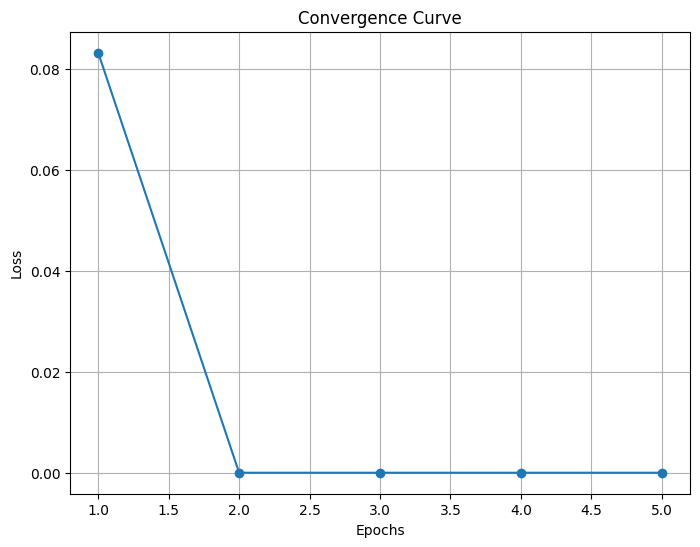

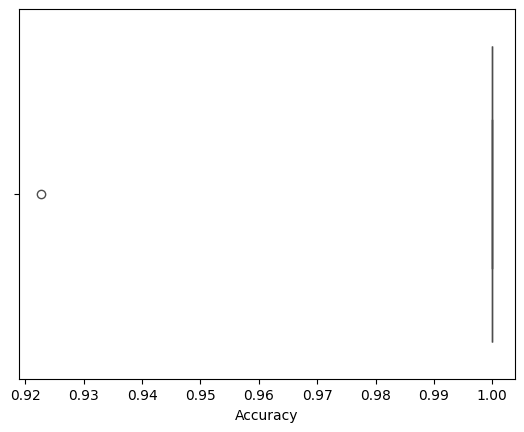

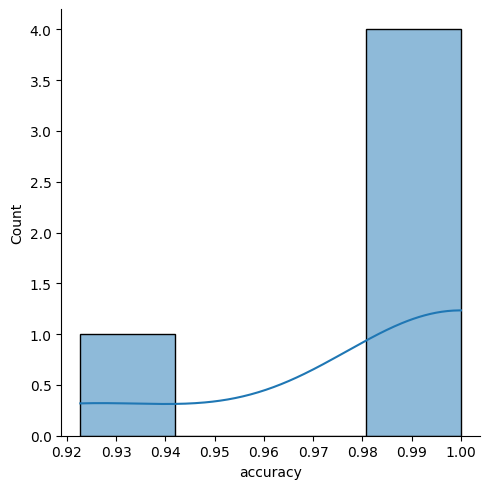

done
9/9 [==============================] - 93s 10s/step - loss: 0.0933 - accuracy: 0.8877 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.09329727292060852
i am loss list [0.09329727292060852]
Epoch 1: Start Time - 2024-06-14 11:12:12.516166, Stop Time - 2024-06-14 11:14:36.392162
Test loss for Epoch 1: 0.09329727292060852
Test accuracy for Epoch 1: 0.8876909017562866
9/9 [==============================] - 103s 12s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.09329727292060852, 0.0]
Epoch 2: Start Time - 2024-06-14 11:14:36.393470, Stop Time - 2024-06-14 11:16:58.470001
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 94s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.09329727292060852, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 11:16:58.470339, Stop Time - 2024-06-14 11:19:20.547519
Test loss for Epoch 3:

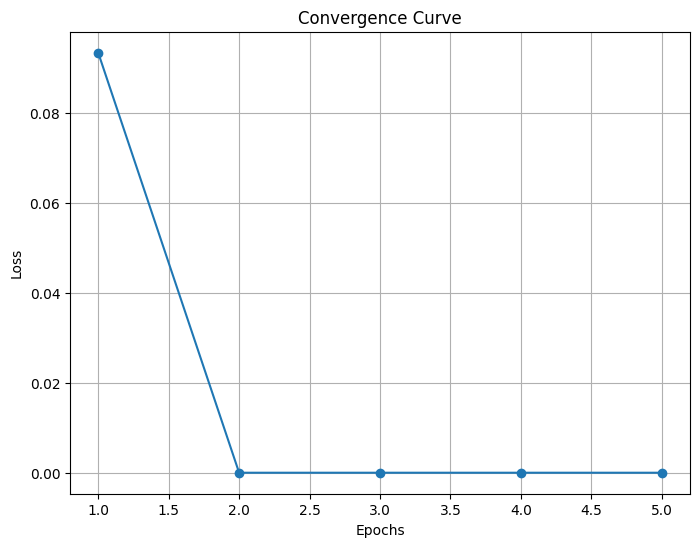

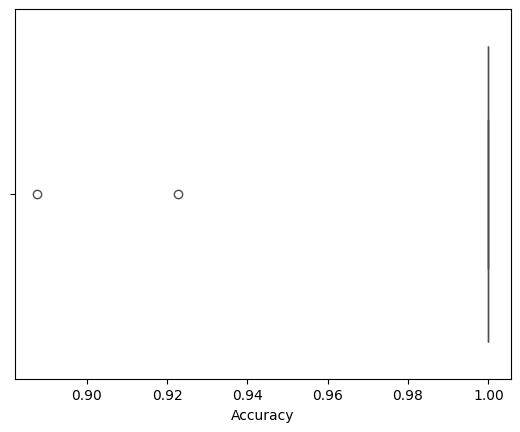

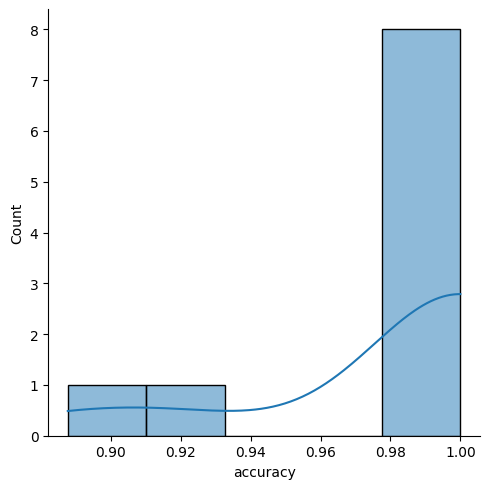

done
9/9 [==============================] - 96s 11s/step - loss: 0.1241 - accuracy: 0.9416 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.1241413950920105
i am loss list [0.1241413950920105]
Epoch 1: Start Time - 2024-06-14 11:26:19.156964, Stop Time - 2024-06-14 11:28:42.327211
Test loss for Epoch 1: 0.1241413950920105
Test accuracy for Epoch 1: 0.9415993094444275
9/9 [==============================] - 94s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.1241413950920105, 0.0]
Epoch 2: Start Time - 2024-06-14 11:28:42.327551, Stop Time - 2024-06-14 11:31:04.398431
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 95s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.1241413950920105, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 11:31:04.398805, Stop Time - 2024-06-14 11:32:39.939344
Test loss for Epoch 3: 0.0
T

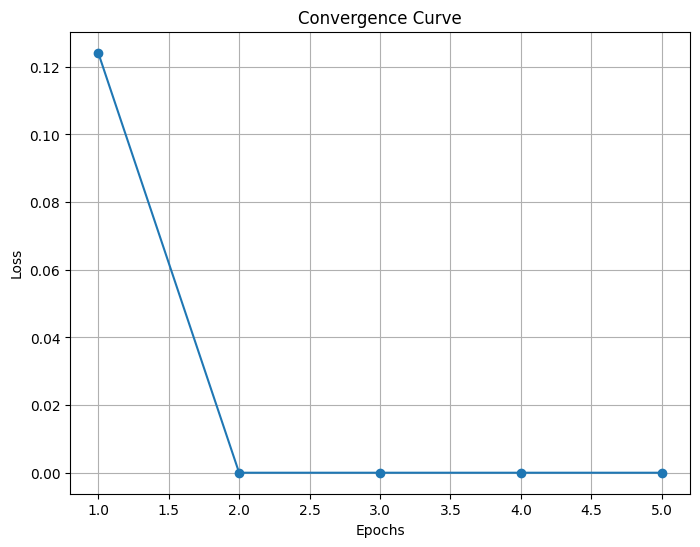

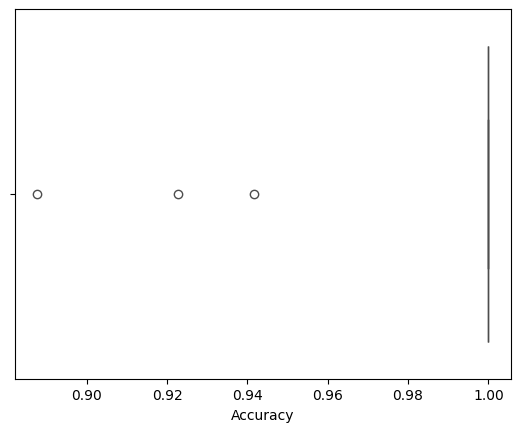

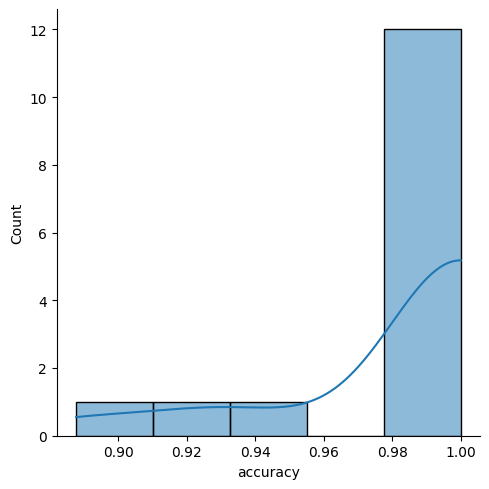

done
9/9 [==============================] - 108s 12s/step - loss: 0.1264 - accuracy: 0.9191 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.1264173984527588
i am loss list [0.1264173984527588]
Epoch 1: Start Time - 2024-06-14 11:38:48.483062, Stop Time - 2024-06-14 11:40:37.143273
Test loss for Epoch 1: 0.1264173984527588
Test accuracy for Epoch 1: 0.9191374778747559
9/9 [==============================] - 93s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.1264173984527588, 0.0]
Epoch 2: Start Time - 2024-06-14 11:40:37.143551, Stop Time - 2024-06-14 11:42:10.334953
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 96s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.1264173984527588, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 11:42:10.335229, Stop Time - 2024-06-14 11:43:46.476162
Test loss for Epoch 3: 0.0


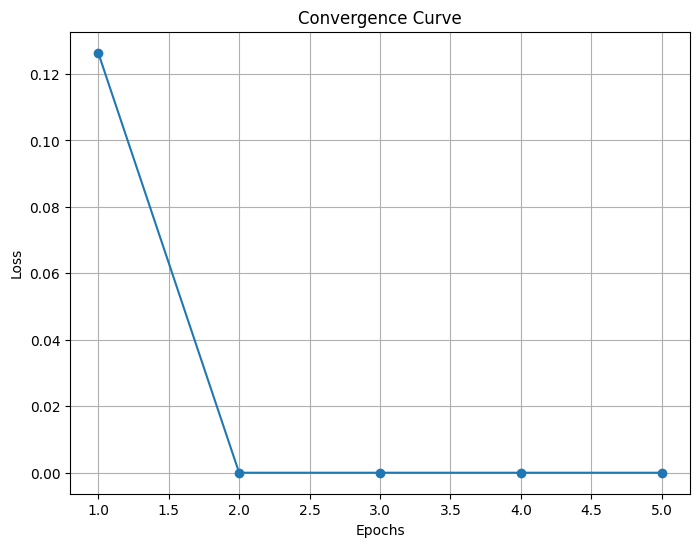

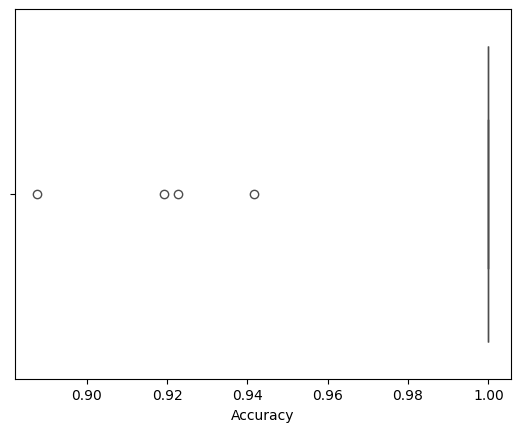

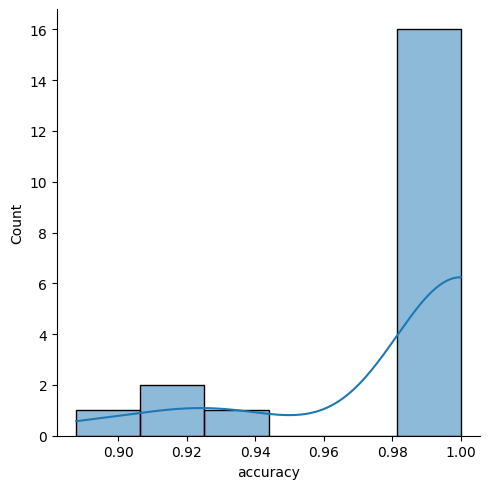

done
9/9 [==============================] - 98s 11s/step - loss: 0.1216 - accuracy: 0.9614 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.12164830416440964
i am loss list [0.12164830416440964]
Epoch 1: Start Time - 2024-06-14 11:50:49.669399, Stop Time - 2024-06-14 11:52:27.376880
Test loss for Epoch 1: 0.12164830416440964
Test accuracy for Epoch 1: 0.9613656997680664
9/9 [==============================] - 96s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.12164830416440964, 0.0]
Epoch 2: Start Time - 2024-06-14 11:52:27.378841, Stop Time - 2024-06-14 11:54:03.468104
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 93s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.12164830416440964, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 11:54:03.468400, Stop Time - 2024-06-14 11:56:25.551672
Test loss for Epoch 3: 

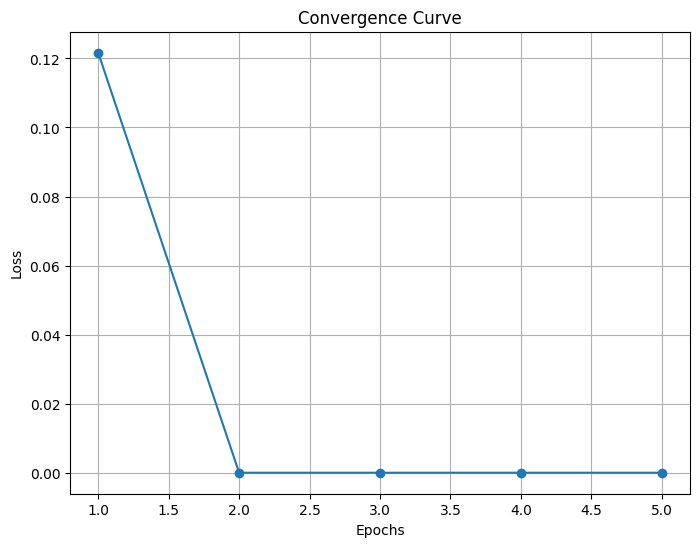

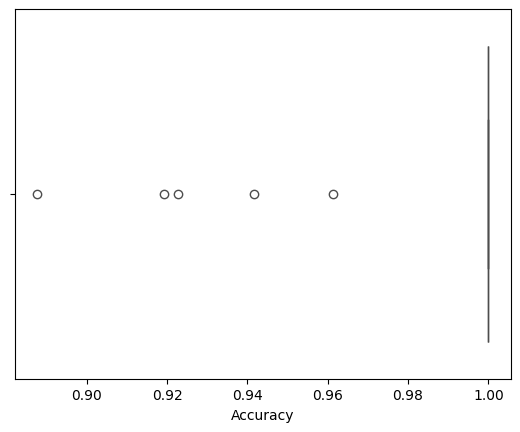

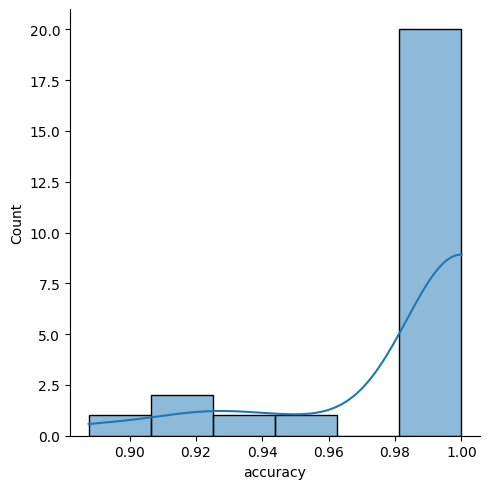

done
9/9 [==============================] - 103s 11s/step - loss: 0.1900 - accuracy: 0.8895 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.18995726108551025
i am loss list [0.18995726108551025]
Epoch 1: Start Time - 2024-06-14 12:02:42.005632, Stop Time - 2024-06-14 12:05:05.214916
Test loss for Epoch 1: 0.18995726108551025
Test accuracy for Epoch 1: 0.8894878625869751
9/9 [==============================] - 100s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.18995726108551025, 0.0]
Epoch 2: Start Time - 2024-06-14 12:05:05.215659, Stop Time - 2024-06-14 12:07:27.363872
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 95s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.18995726108551025, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 12:07:27.364933, Stop Time - 2024-06-14 12:09:49.455669
Test loss for Epoch 3

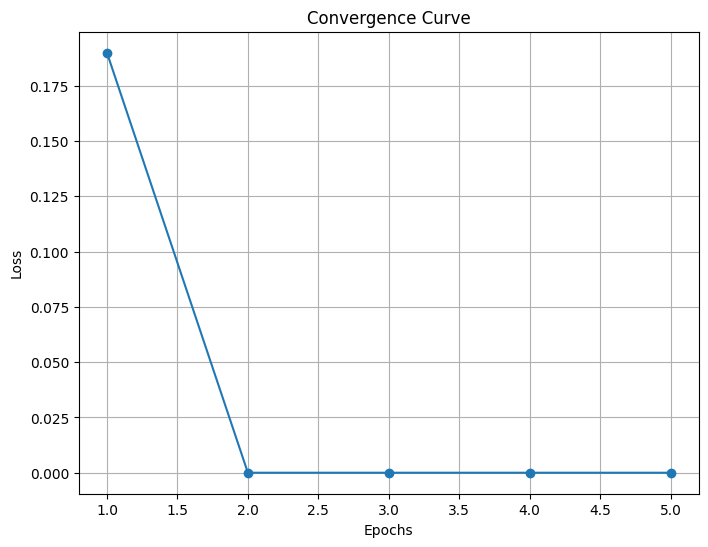

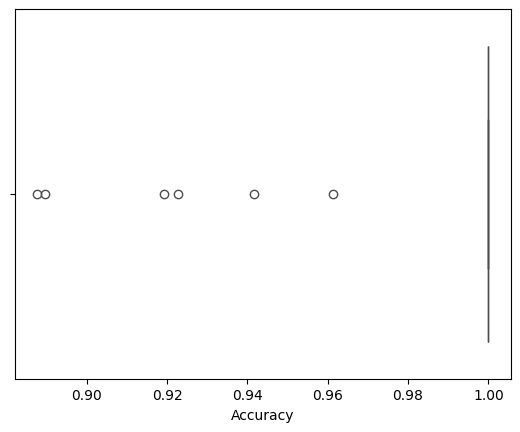

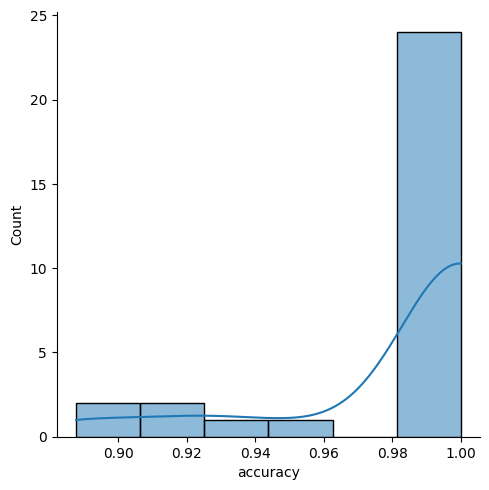

done
9/9 [==============================] - 91s 10s/step - loss: 0.1877 - accuracy: 0.8931 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.1877162903547287
i am loss list [0.1877162903547287]
Epoch 1: Start Time - 2024-06-14 12:16:09.090670, Stop Time - 2024-06-14 12:17:40.703714
Test loss for Epoch 1: 0.1877162903547287
Test accuracy for Epoch 1: 0.893081784248352
9/9 [==============================] - 93s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.1877162903547287, 0.0]
Epoch 2: Start Time - 2024-06-14 12:17:40.705283, Stop Time - 2024-06-14 12:19:14.278453
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 109s 13s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.1877162903547287, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 12:19:14.278738, Stop Time - 2024-06-14 12:21:03.899026
Test loss for Epoch 3: 0.0
T

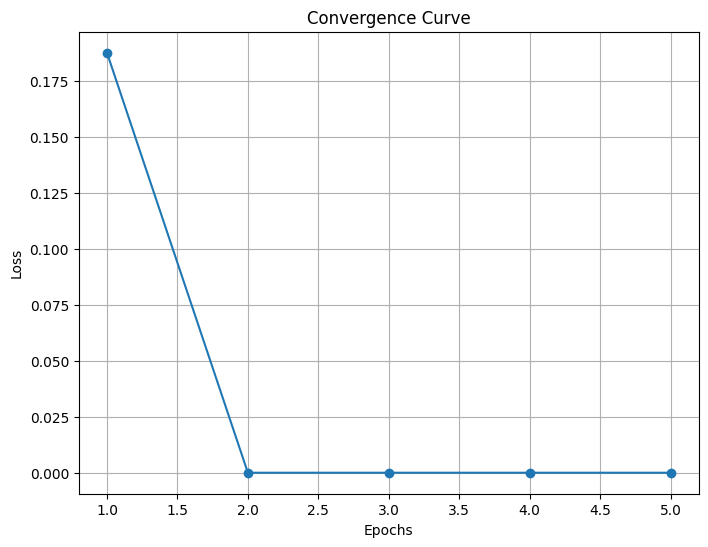

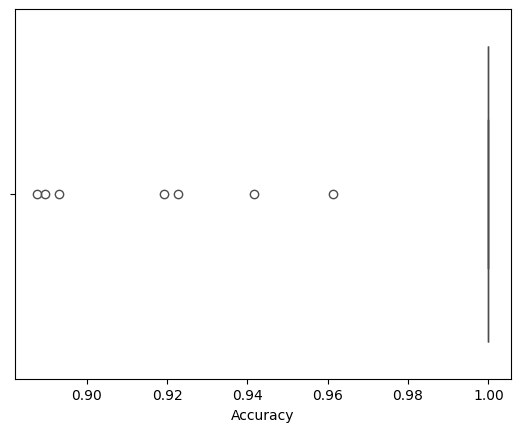

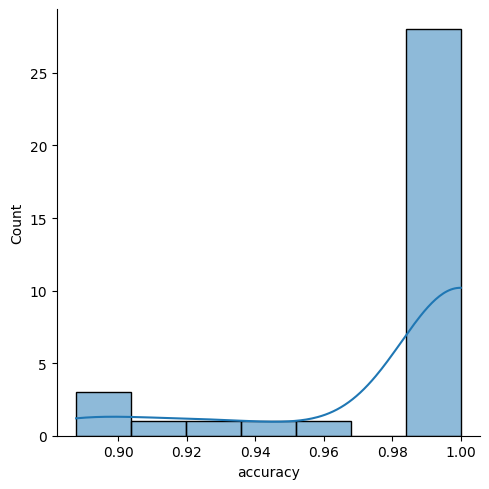

done
9/9 [==============================] - 91s 10s/step - loss: 0.1922 - accuracy: 0.8904 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.19223295152187347
i am loss list [0.19223295152187347]
Epoch 1: Start Time - 2024-06-14 12:28:05.214257, Stop Time - 2024-06-14 12:29:36.322648
Test loss for Epoch 1: 0.19223295152187347
Test accuracy for Epoch 1: 0.8903863430023193
9/9 [==============================] - 100s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.19223295152187347, 0.0]
Epoch 2: Start Time - 2024-06-14 12:29:36.323706, Stop Time - 2024-06-14 12:31:58.431915
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 92s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.19223295152187347, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 12:31:58.434575, Stop Time - 2024-06-14 12:34:20.658996
Test loss for Epoch 3:

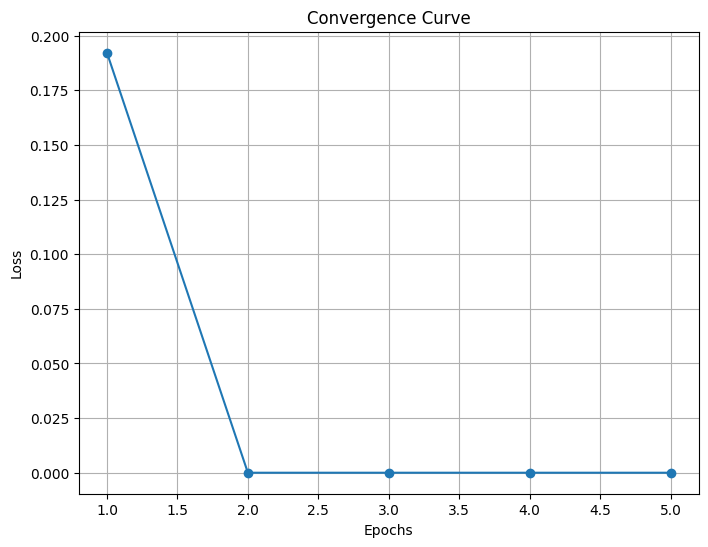

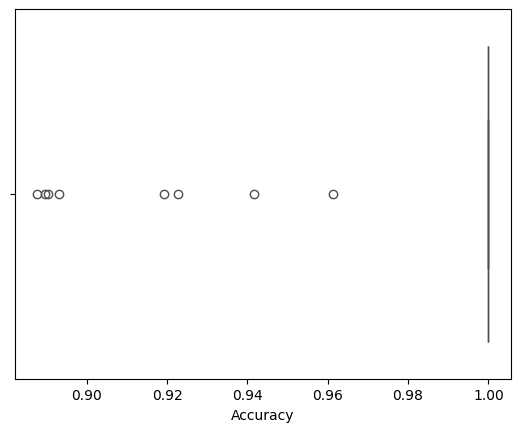

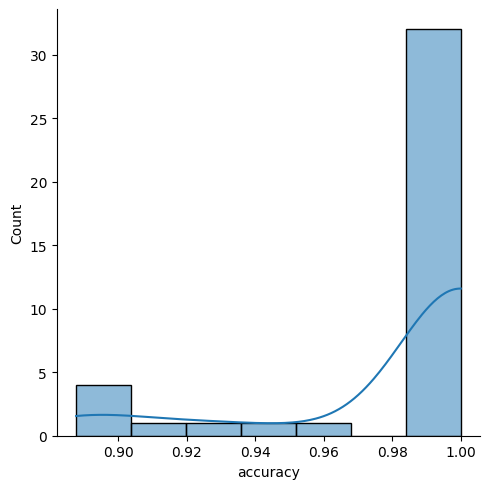

done
9/9 [==============================] - 97s 11s/step - loss: 0.1839 - accuracy: 0.9102 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.1839027851819992
i am loss list [0.1839027851819992]
Epoch 1: Start Time - 2024-06-14 12:40:39.858977, Stop Time - 2024-06-14 12:43:03.034165
Test loss for Epoch 1: 0.1839027851819992
Test accuracy for Epoch 1: 0.9101527333259583
9/9 [==============================] - 100s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.1839027851819992, 0.0]
Epoch 2: Start Time - 2024-06-14 12:43:03.034488, Stop Time - 2024-06-14 12:45:25.119172
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 95s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.1839027851819992, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 12:45:25.119524, Stop Time - 2024-06-14 12:47:47.205312
Test loss for Epoch 3: 0.0


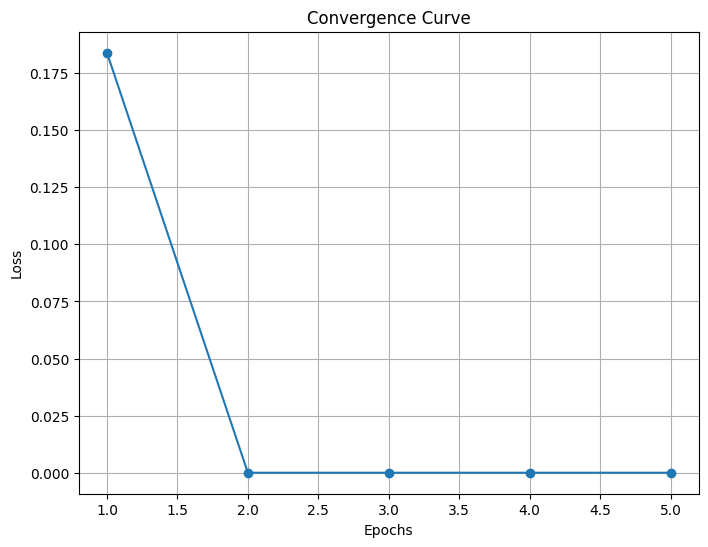

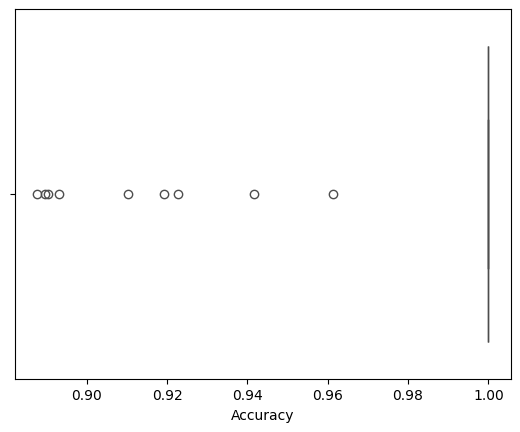

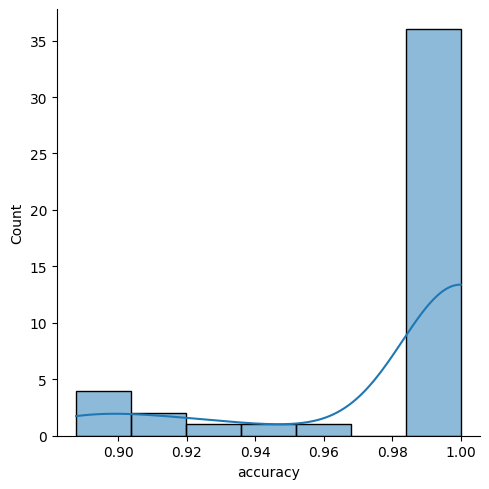

done
9/9 [==============================] - 101s 11s/step - loss: 0.1935 - accuracy: 0.8850 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.19352489709854126
i am loss list [0.19352489709854126]
Epoch 1: Start Time - 2024-06-14 12:54:08.707475, Stop Time - 2024-06-14 12:55:50.139032
Test loss for Epoch 1: 0.19352489709854126
Test accuracy for Epoch 1: 0.8849955201148987
9/9 [==============================] - 96s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.19352489709854126, 0.0]
Epoch 2: Start Time - 2024-06-14 12:55:50.142907, Stop Time - 2024-06-14 12:58:12.216020
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 98s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.19352489709854126, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 12:58:12.216375, Stop Time - 2024-06-14 12:59:49.995002
Test loss for Epoch 3:

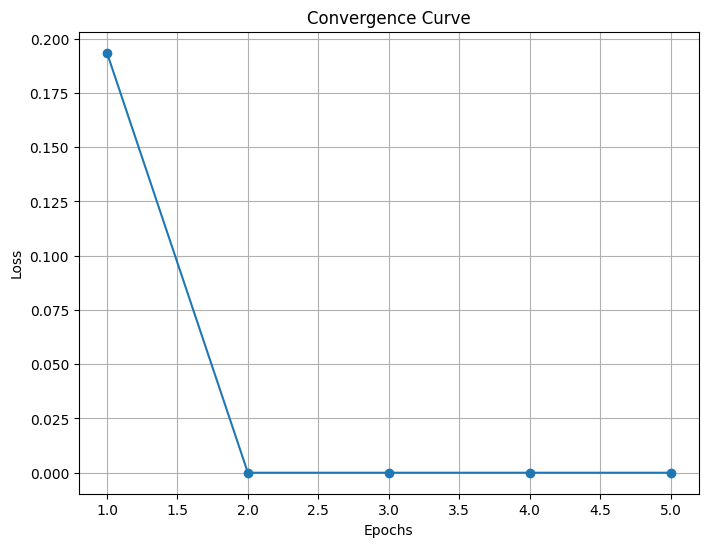

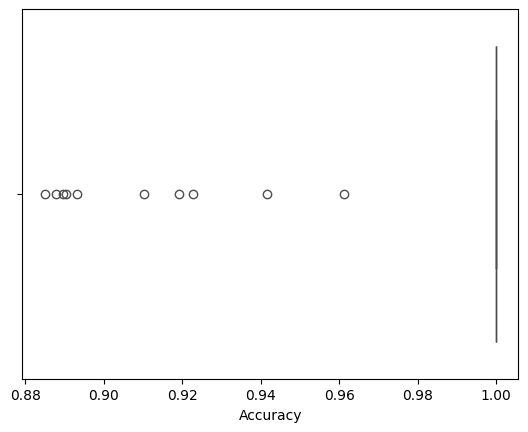

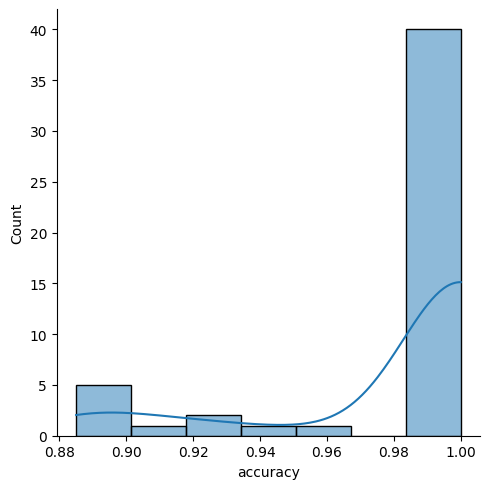

done
9/9 [==============================] - 93s 10s/step - loss: 0.0923 - accuracy: 0.8868 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.09232154488563538
i am loss list [0.09232154488563538]
Epoch 1: Start Time - 2024-06-14 13:05:13.625954, Stop Time - 2024-06-14 13:07:38.146256
Test loss for Epoch 1: 0.09232154488563538
Test accuracy for Epoch 1: 0.8867924809455872
9/9 [==============================] - 96s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.09232154488563538, 0.0]
Epoch 2: Start Time - 2024-06-14 13:07:38.147533, Stop Time - 2024-06-14 13:09:13.921016
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 93s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.09232154488563538, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 13:09:13.921255, Stop Time - 2024-06-14 13:11:35.937854
Test loss for Epoch 3: 

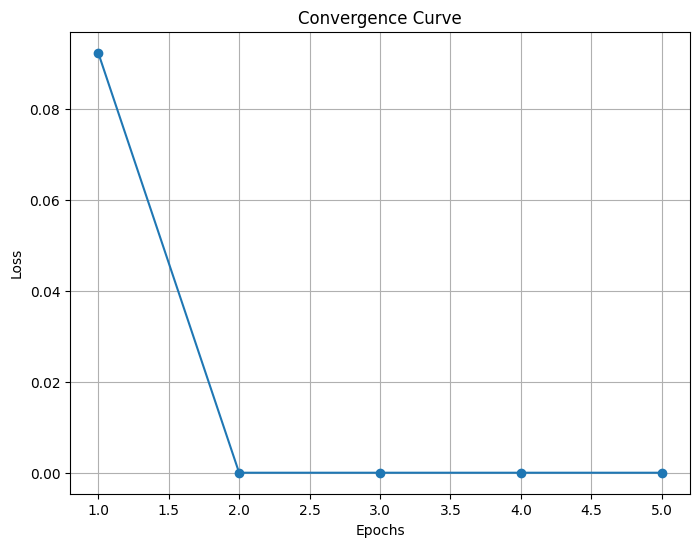

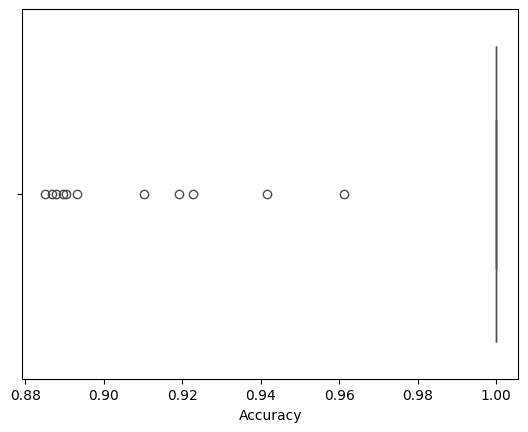

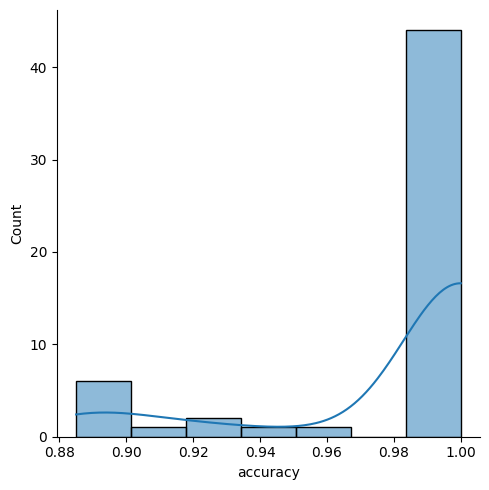

done
9/9 [==============================] - 96s 11s/step - loss: 0.0742 - accuracy: 0.9847 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.07418641448020935
i am loss list [0.07418641448020935]
Epoch 1: Start Time - 2024-06-14 13:18:34.077915, Stop Time - 2024-06-14 13:20:57.734390
Test loss for Epoch 1: 0.07418641448020935
Test accuracy for Epoch 1: 0.9847259521484375
9/9 [==============================] - 99s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.07418641448020935, 0.0]
Epoch 2: Start Time - 2024-06-14 13:20:57.734747, Stop Time - 2024-06-14 13:22:36.485610
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
9/9 [==============================] - 97s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
i am loss list [0.07418641448020935, 0.0, 0.0]
Epoch 3: Start Time - 2024-06-14 13:22:36.487256, Stop Time - 2024-06-14 13:24:13.176882
Test loss for Epoch 3: 

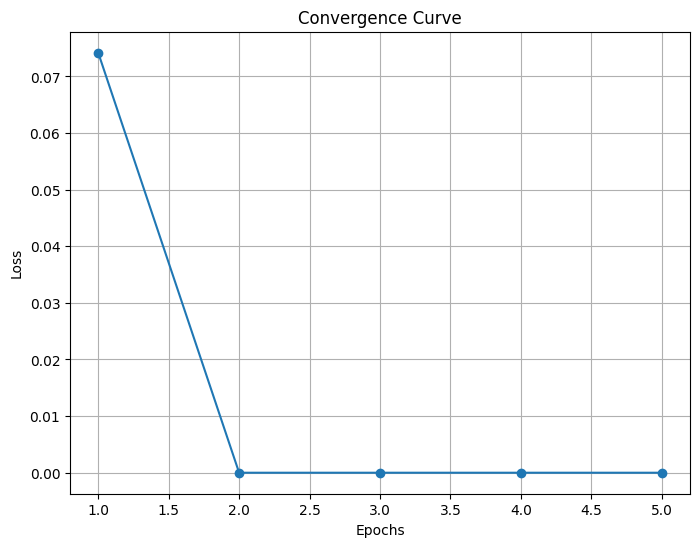

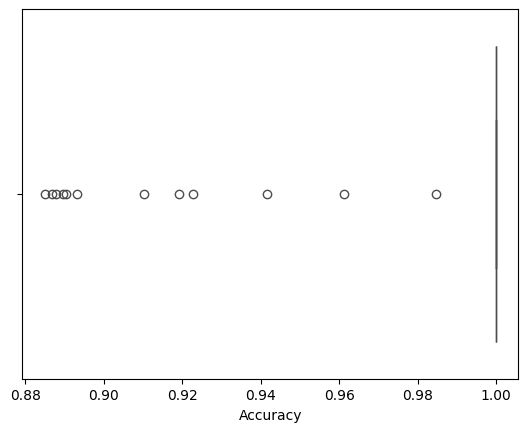

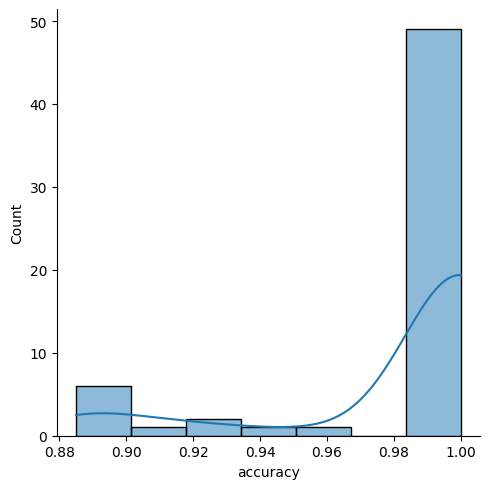

In [14]:
i=0
for s in s_paths:
  name=a[i]
  subfolder=os.listdir(s)
  classes=len(subfolder)
  for label,category in enumerate(subfolder):
    x=[]
    y=[]
    for path in all_subfolder_path:
      img=os.listdir(path)
      for i in img:
        img_path=os.path.join(path,i)
        #extract x and y
        img=cv2.imread(img_path)
        if img is not None:
          img=cv2.resize(img,(img_rows,img_cols))
        else:
          print("Image not loaded or does not exist.")
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        x.append(img)
        y.append(label)
    x=np.array(x)
    x=x.astype('float32')/255.0
    y=np.array(y)
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    y_train = to_categorical(y_train, classes)
    y_test = to_categorical(y_test, classes)
    model=Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(img_rows, img_cols, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
    print("done")
    epochs_list=[]
    start_time_list=[]
    stop_time_list=[]
    loss_list=[]
    accuracy_list=[]
    start_time_total=datetime.datetime.now()
    for epoch in range(epochs):
      start_time=datetime.datetime.now()
      history=model.fit(x_train,y_train,batch_size=batch_size,epochs=1,verbose=1,validation_data=(x_test,y_test))
      stop_time=datetime.datetime.now()
      loss=history.history['loss'][0]
      print(loss)
      accuracy=history.history['accuracy'][0]
      epochs_list.append(epoch + 1)
      start_time_list.append(start_time)
      stop_time_list.append(stop_time)
      loss_list.append(loss)
      print('i am loss list',loss_list)
      accuracy_list.append(accuracy)
      print(f"Epoch {epoch + 1}: Start Time - {start_time}, Stop Time - {stop_time}")
      print(f'Test loss for Epoch {epoch + 1}: {loss}')
      print(f'Test accuracy for Epoch {epoch + 1}: {accuracy}')
    stop_time_total = datetime.datetime.now()
    history_df = pd.DataFrame({
        'epoch': epochs_list,
        'start_time': start_time_list,
        'stop_time': stop_time_list,
        'loss': loss_list,
        'accuracy': accuracy_list,
        'execution_time':stop_time_total
        })
    print(history_df.head())
    print(history_df.dtypes)
    history_df['Experiment']=1
    history_df['Optimizer']="PSO"
    history_df['Dataset']=name
    history_df['Objfname']="CNN"
    history_df['Iteration accuracy']=accuracy
    history_df=history_df[['epoch','Optimizer','Dataset','Objfname','Experiment','start_time','stop_time','execution_time','accuracy','loss','Iteration accuracy']]
    existing_data = pd.read_excel("/content/file.xlsx")
    def format_date(date):
      return pd.to_datetime(date).strftime('%Y-%m-%d %H:%M:%S')
    combined_data = pd.concat([existing_data, history_df], ignore_index=True)
    combined_data['start_time']=combined_data['start_time'].apply(format_date)
    combined_data['stop_time']=combined_data['stop_time'].apply(format_date)
    combined_data.to_excel('file.xlsx', index=False)
    epoch_values = [1,2,3,4,5]  # X-axis values (e.g., epochs or iterations)
    loss_values = loss_list  # Y-axis values (e.g., loss)
    print(loss_values)
    plt.figure(figsize=(8, 6))
    plt.plot(epoch_values, loss_values, marker='o', linestyle='-')
    plt.title('Convergence Curve')
    plt.xlabel('Epochs')
    print(type(epochs))
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
    i=1
    plt.savefig(f"Conv_curve{i}.png",format="png")
    data1=pd.read_excel('/content/file.xlsx')
    plot=sns.boxplot(data=data1,x=data1['accuracy'],color='yellow')
    plt.xlabel('Accuracy')
    sns.displot(data1['accuracy'],kde=True)
    plt.savefig("box.png", format="png")
    plt.show()
    i=i+1


In [ ]:
# -*- coding: utf-8 -*-

"""PSO module

Copyright (c) 2017 Future Processing sp. z.o.o.

@author: Pablo Ribalta Lorenzo
@email: pribalta@future-processing.com)
@date: 10.04.2017

This module encapsulates all the functionality related to Particle
Swarm Optimization, including the algorithm itself and the Particles
"""

import copy
import numpy as np

class Particle(object):
    """Particle class for PSO

    This class encapsulates the behavior of each particle in PSO and provides
    an efficient way to do bookkeeping about the state of the swarm in any given
    iteration.

    Args:
        lower_bound (np.array): Vector of lower boundaries for particle dimensions.
        upper_bound (np.array): Vector of upper boundaries for particle dimensions.
        dimensions (int): Number of dimensions of the search space.
        objective function (function): Black-box function to evaluate.

    """
    def __init__(self,
                 lower_bound,
                 upper_bound,
                 dimensions,
                 objective_function):
        self.reset(dimensions, lower_bound, upper_bound, objective_function)

    def reset(self,
              dimensions,
              lower_bound,
              upper_bound,
              objective_function):
        """Particle reset

        Allows for reset of a particle without reallocation.

		Args:
			lower_bound (np.array): Vector of lower boundaries for particle dimensions.
			upper_bound (np.array): Vector of upper boundaries for particle dimensions.
			dimensions (int): Number of dimensions of the search space.

        """
        position = []
        for i in range(dimensions):
            if lower_bound[i] < upper_bound[i]:
                position.extend(np.random.randint(lower_bound[i], upper_bound[i] + 1, 1, dtype=int))
            elif lower_bound[i] == upper_bound[i]:
                position.extend(np.array([lower_bound[i]], dtype=int))
            else:
                assert False

        self.position = [position]

        self.velocity = [np.multiply(np.random.rand(dimensions),
                                     (upper_bound - lower_bound)).astype(int)]

        self.best_position = self.position[:]

        self.function_value = [objective_function(self.best_position[-1])]
        self.best_function_value = self.function_value[:]

    def update_velocity(self, omega, phip, phig, best_swarm_position):
        """Particle velocity update

		Args:
			omega (float): Velocity equation constant.
			phip (float): Velocity equation constant.
			phig (float): Velocity equation constant.
			best_swarm_position (np.array): Best particle position.

        """
        random_coefficient_p = np.random.uniform(size=np.asarray(self.position[-1]).shape)
        random_coefficient_g = np.random.uniform(size=np.asarray(self.position[-1]).shape)

        self.velocity.append(omega
                             * np.asarray(self.velocity[-1])
                             + phip
                             * random_coefficient_p
                             * (np.asarray(self.best_position[-1])
                                - np.asarray(self.position[-1]))
                             + phig
                             * random_coefficient_g
                             * (np.asarray(best_swarm_position)
                                - np.asarray(self.position[-1])))

        self.velocity[-1] = self.velocity[-1].astype(int)

    def update_position(self, lower_bound, upper_bound, objective_function):
        """Particle position update

		Args:
			lower_bound (np.array): Vector of lower boundaries for particle dimensions.
			upper_bound (np.array): Vector of upper boundaries for particle dimensions.
			objective function (function): Black-box function to evaluate.

        """
        new_position = self.position[-1] + self.velocity[-1]

        if np.array_equal(self.position[-1], new_position):
            self.function_value.append(self.function_value[-1])
        else:
            mark1 = new_position < lower_bound
            mark2 = new_position > upper_bound

            new_position[mark1] = lower_bound[mark1]
            new_position[mark2] = upper_bound[mark2]

            self.function_value.append(objective_function(self.position[-1]))

        self.position.append(new_position.tolist())

        if self.function_value[-1] < self.best_function_value[-1]:
            self.best_position.append(self.position[-1][:])
            self.best_function_value.append(self.function_value[-1])

class Pso(object):
    """PSO wrapper

    This class contains the particles and provides an abstraction to hold all the context
    of the PSO algorithm

    Args:
        swarmsize (int): Number of particles in the swarm
        maxiter (int): Maximum number of generations the swarm will run

    """
    def __init__(self, swarmsize=100, maxiter=100):
        self.max_generations = maxiter
        self.swarmsize = swarmsize

        self.omega = 0.5
        self.phip = 0.5
        self.phig = 0.5

        self.minstep = 1e-4
        self.minfunc = 1e-4

        self.best_position = [None]
        self.best_function_value = [1]

        self.particles = []

        self.retired_particles = []

    def run(self, function, lower_bound, upper_bound, kwargs=None):
        """Perform a particle swarm optimization (PSO)

		Args:
			objective_function (function): The function to be minimized.
			lower_bound (np.array): Vector of lower boundaries for particle dimensions.
			upper_bound (np.array): Vector of upper boundaries for particle dimensions.

		Returns:
			best_position (np.array): Best known position
			accuracy (float): Objective value at best_position
			:param kwargs:

        """
        if kwargs is None:
            kwargs = {}

        objective_function = lambda x: function(x, **kwargs)
        assert hasattr(function, '__call__'), 'Invalid function handle'

        assert len(lower_bound) == len(upper_bound), 'Invalid bounds length'

        lower_bound = np.array(lower_bound)
        upper_bound = np.array(upper_bound)

        assert np.all(upper_bound > lower_bound), 'Invalid boundary values'


        dimensions = len(lower_bound)

        self.particles = self.initialize_particles(lower_bound,
                                                   upper_bound,
                                                   dimensions,
                                                   objective_function)

        # Start evolution
        generation = 1
        while generation <= self.max_generations:
            for particle in self.particles:
                particle.update_velocity(self.omega, self.phip, self.phig, self.best_position[-1])
                particle.update_position(lower_bound, upper_bound, objective_function)

                if particle.best_function_value[-1] == 0:
                    self.retired_particles.append(copy.deepcopy(particle))
                    particle.reset(dimensions, lower_bound, upper_bound, objective_function)
                elif particle.best_function_value[-1] < self.best_function_value[-1]:
                    stepsize = np.sqrt(np.sum((np.asarray(self.best_position[-1])
                                               - np.asarray(particle.position[-1])) ** 2))

                    if np.abs(np.asarray(self.best_function_value[-1])
                              - np.asarray(particle.best_function_value[-1])) \
                            <= self.minfunc:
                        return particle.best_position[-1], particle.best_function_value[-1]
                    elif stepsize <= self.minstep:
                        return particle.best_position[-1], particle.best_function_value[-1]
                    else:
                        self.best_function_value.append(particle.best_function_value[-1])
                        self.best_position.append(particle.best_position[-1][:])



            generation += 1

        return self.best_position[-1], self.best_function_value[-1]

    def initialize_particles(self,
                             lower_bound,
                             upper_bound,
                             dimensions,
                             objective_function):
        """Initializes the particles for the swarm

		Args:
			objective_function (function): The function to be minimized.
			lower_bound (np.array): Vector of lower boundaries for particle dimensions.
			upper_bound (np.array): Vector of upper boundaries for particle dimensions.
			dimensions (int): Number of dimensions of the search space.

		Returns:
			particles (list): Collection or particles in the swarm

        """
        particles = []
        for _ in range(self.swarmsize):
            particles.append(Particle(lower_bound,
                                      upper_bound,
                                      dimensions,
                                      objective_function))
            if particles[-1].best_function_value[-1] < self.best_function_value[-1]:
                self.best_function_value.append(particles[-1].best_function_value[-1])
                self.best_position.append(particles[-1].best_position[-1])


        self.best_position = [self.best_position[-1]]
        self.best_function_value = [self.best_function_value[-1]]

        return particles

In [ ]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configuration variables
batch_size = 12
epochs = 5
img_rows, img_cols = 28, 28

# Load and preprocess data
def load_data(s_paths):
    x = []
    y = []
    classes = len(os.listdir(s_paths[0]))
    for s in s_paths:
        subfolder = os.listdir(s)
        for label, category in enumerate(subfolder):
            category_path = os.path.join(s, category)
            img_paths = os.listdir(category_path)
            for img_name in img_paths:
                img_path = os.path.join(category_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (img_rows, img_cols))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    x.append(img)
                    y.append(label)
        x = np.array(x)
        x = x.astype('float32') / 255.0
        y = np.array(y)
        return x, y, classes
        print(x)
        print(y)
        print(classes)

# Define the function to optimize
def func(x):
    n, sf, sp, l = x[0], x[1], x[2], x[3]

    x_train, x_test, y_train, y_test = prepare_data()

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(n, (sf, sf), activation='relu'))
    model.add(MaxPooling2D(pool_size=(sp, sp), strides=(l, l)))
    model.add(Flatten())
    model.add(Dense(classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

    cp = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')]

    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test), callbacks=cp)

    score = model.evaluate(x_test, y_test, verbose=0)

    print('current config:', x, 'val:', score[1])
    return score[1]

# Prepare data for training and testing
def prepare_data():
    # Assuming s_paths is defined or passed as an argument
    s_paths = ['/content/drive/MyDrive/mera_data/BEH','/content/drive/MyDrive/mera_data/DRHAGIS','/content/drive/MyDrive/mera_data/LES-AV','/content/drive/MyDrive/mera_data/PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0']  # Update with actual paths
    x, y, classes = load_data(s_paths)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    y_train = to_categorical(y_train, classes)
    y_test = to_categorical(y_test, classes)
    return x_train, x_test, y_train, y_test

# PSO Optimization
pso = Pso(swarmsize=4, maxiter=14)
# n, sf, sp, l
bp, value = pso.run(func, [1, 2, 2, 2], [16, 8, 4, 4])

v = func(bp)

print('Test loss:', bp)
print('Test accuracy:', value, v)
epochs_list=[]
    start_time_list=[]
    stop_time_list=[]
    loss_list=[]
    accuracy_list=[]
    start_time_total=datetime.datetime.now()
    for epoch in range(epochs):
      start_time=datetime.datetime.now()
      history=model.fit(x_train,y_train,batch_size=batch_size,epochs=1,verbose=1,validation_data=(x_test,y_test))
      stop_time=datetime.datetime.now()
      loss=history.history['loss'][0]
      print(loss)
      accuracy=history.history['accuracy'][0]
      epochs_list.append(epoch + 1)
      start_time_list.append(start_time)
      stop_time_list.append(stop_time)
      loss_list.append(loss)
      print('i am loss list',loss_list)
      accuracy_list.append(accuracy)
      print(f"Epoch {epoch + 1}: Start Time - {start_time}, Stop Time - {stop_time}")
      print(f'Test loss for Epoch {epoch + 1}: {loss}')
      print(f'Test accuracy for Epoch {epoch + 1}: {accuracy}')
    stop_time_total = datetime.datetime.now()
    history_df = pd.DataFrame({
        'epoch': epochs_list,
        'start_time': start_time_list,
        'stop_time': stop_time_list,
        'loss': loss_list,
        'accuracy': accuracy_list,
        'execution_time':stop_time_total
        })
    print(history_df.head())
    print(history_df.dtypes)
    history_df['Experiment']=1
    history_df['Optimizer']="PSO"
    history_df['Dataset']=name
    history_df['Objfname']="CNN"
    history_df['Iteration accuracy']=accuracy
    history_df=history_df[['epoch','Optimizer','Dataset','Objfname','Experiment','start_time','stop_time','execution_time','accuracy','loss','Iteration accuracy']]
    existing_data = pd.read_excel("/content/file.xlsx")
    def format_date(date):
      return pd.to_datetime(date).strftime('%Y-%m-%d %H:%M:%S')
    combined_data = pd.concat([existing_data, history_df], ignore_index=True)
    combined_data['start_time']=combined_data['start_time'].apply(format_date)
    combined_data['stop_time']=combined_data['stop_time'].apply(format_date)
    combined_data.to_excel('file.xlsx', index=False)
    epoch_values = [1,2,3,4,5]  # X-axis values (e.g., epochs or iterations)
    loss_values = loss_list  # Y-axis values (e.g., loss)
    print(loss_values)
    plt.figure(figsize=(8, 6))
    plt.plot(epoch_values, loss_values, marker='o', linestyle='-')
    plt.title('Convergence Curve')
    plt.xlabel('Epochs')
    print(type(epochs))
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
    i=1
    plt.savefig(f"Conv_curve{i}.png",format="png")
    data1=pd.read_excel('/content/file.xlsx')
    plot=sns.boxplot(data=data1,x=data1['accuracy'],color='yellow')
    plt.xlabel('Accuracy')
    sns.displot(data1['accuracy'],kde=True)
    plt.savefig("box.png", format="png")
    plt.show()
    i=i+1

Code